In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#SKlearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Metrics and utilities
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

#Display settings
sns.set_theme(style = 'whitegrid', palette = 'muted', font_scale= 1.05)
pd.set_option('display.max_columns',200)



In [3]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/DS_Datasets/customer_data.csv')
print("shape : " ,df.shape)
df.head()

shape :  (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Initial Inspection

In [4]:
#Info and summary
display(df.info())
display(df.describe(include = 'all').T)

#Missing values
print("\n missing values per column")
print(df.isnull().sum)

#Target distribution
print("\nChurn value counts:")
print(df['churn'].value_counts(normalize = False))
print("\nChurn proportion:")
print(df['churn'].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0



 missing values per column
<bound method DataFrame.sum of       customer_id  credit_score  country  gender    age  tenure  balance  \
0           False         False    False   False  False   False    False   
1           False         False    False   False  False   False    False   
2           False         False    False   False  False   False    False   
3           False         False    False   False  False   False    False   
4           False         False    False   False  False   False    False   
...           ...           ...      ...     ...    ...     ...      ...   
9995        False         False    False   False  False   False    False   
9996        False         False    False   False  False   False    False   
9997        False         False    False   False  False   False    False   
9998        False         False    False   False  False   False    False   
9999        False         False    False   False  False   False    False   

      products_number  credi

Step 4 Exploratory data analysis

we'll look at distributions of numeric features, relationships with churn and categorical features

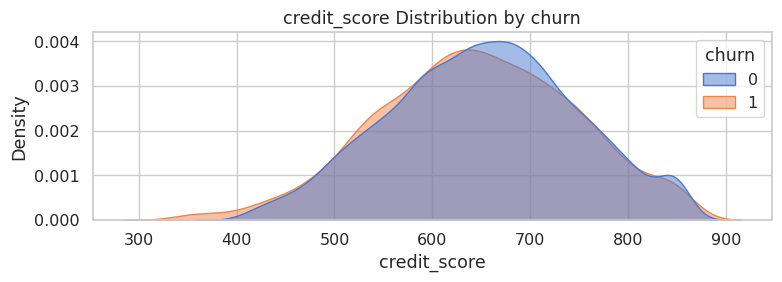

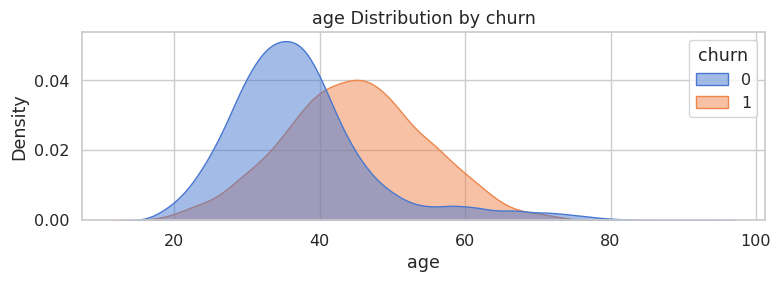

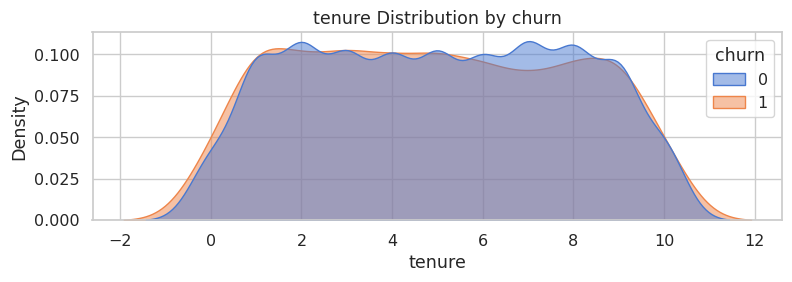

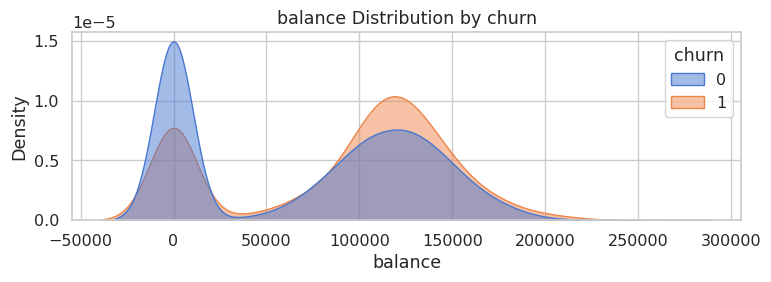

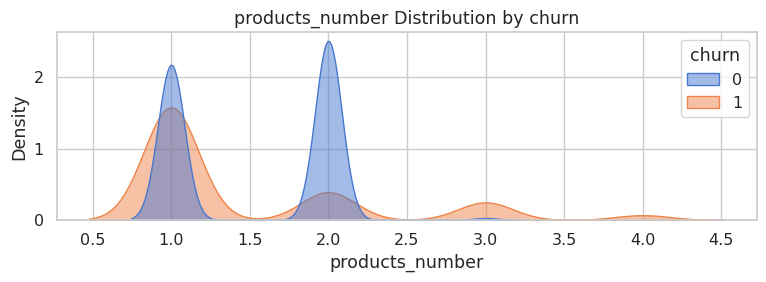

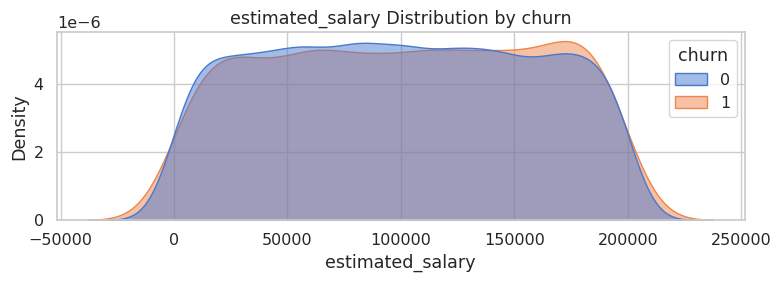

In [5]:
num_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']
# Distribution plots

for col in num_cols:
  plt.figure(figsize=(8,3))
  sns.kdeplot(data = df, x = col, hue = 'churn', fill = True, common_norm =False,alpha = 0.5)
  plt.title(f'{col} Distribution by churn')
  plt.tight_layout()
  plt.show()

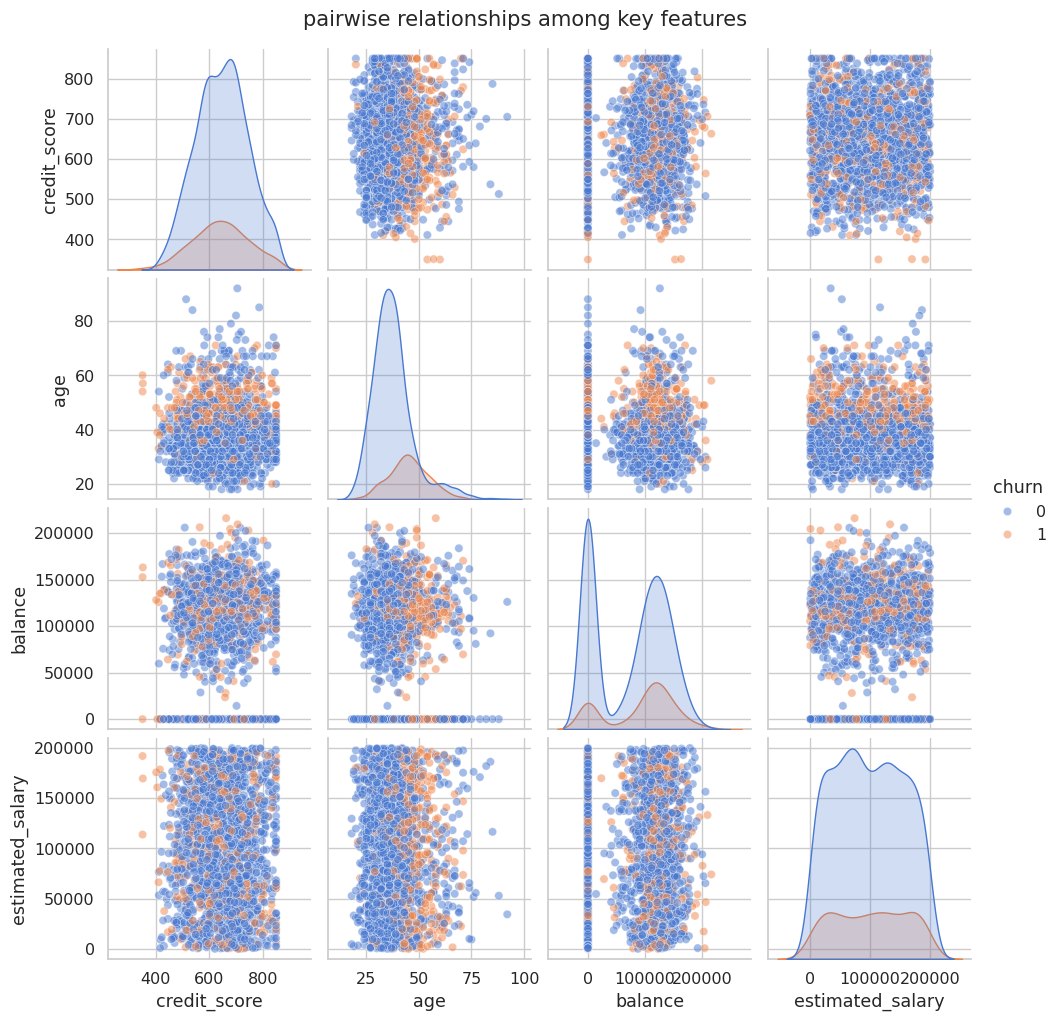

In [6]:
#pairplot
sns.pairplot(df.sample(frac = 0.2, random_state=42),
             vars = ['credit_score','age','balance','estimated_salary'],
             hue = 'churn', diag_kind = 'kde', plot_kws = {'alpha':0.5})
plt.suptitle('pairwise relationships among key features', y = 1.02)
plt.show()

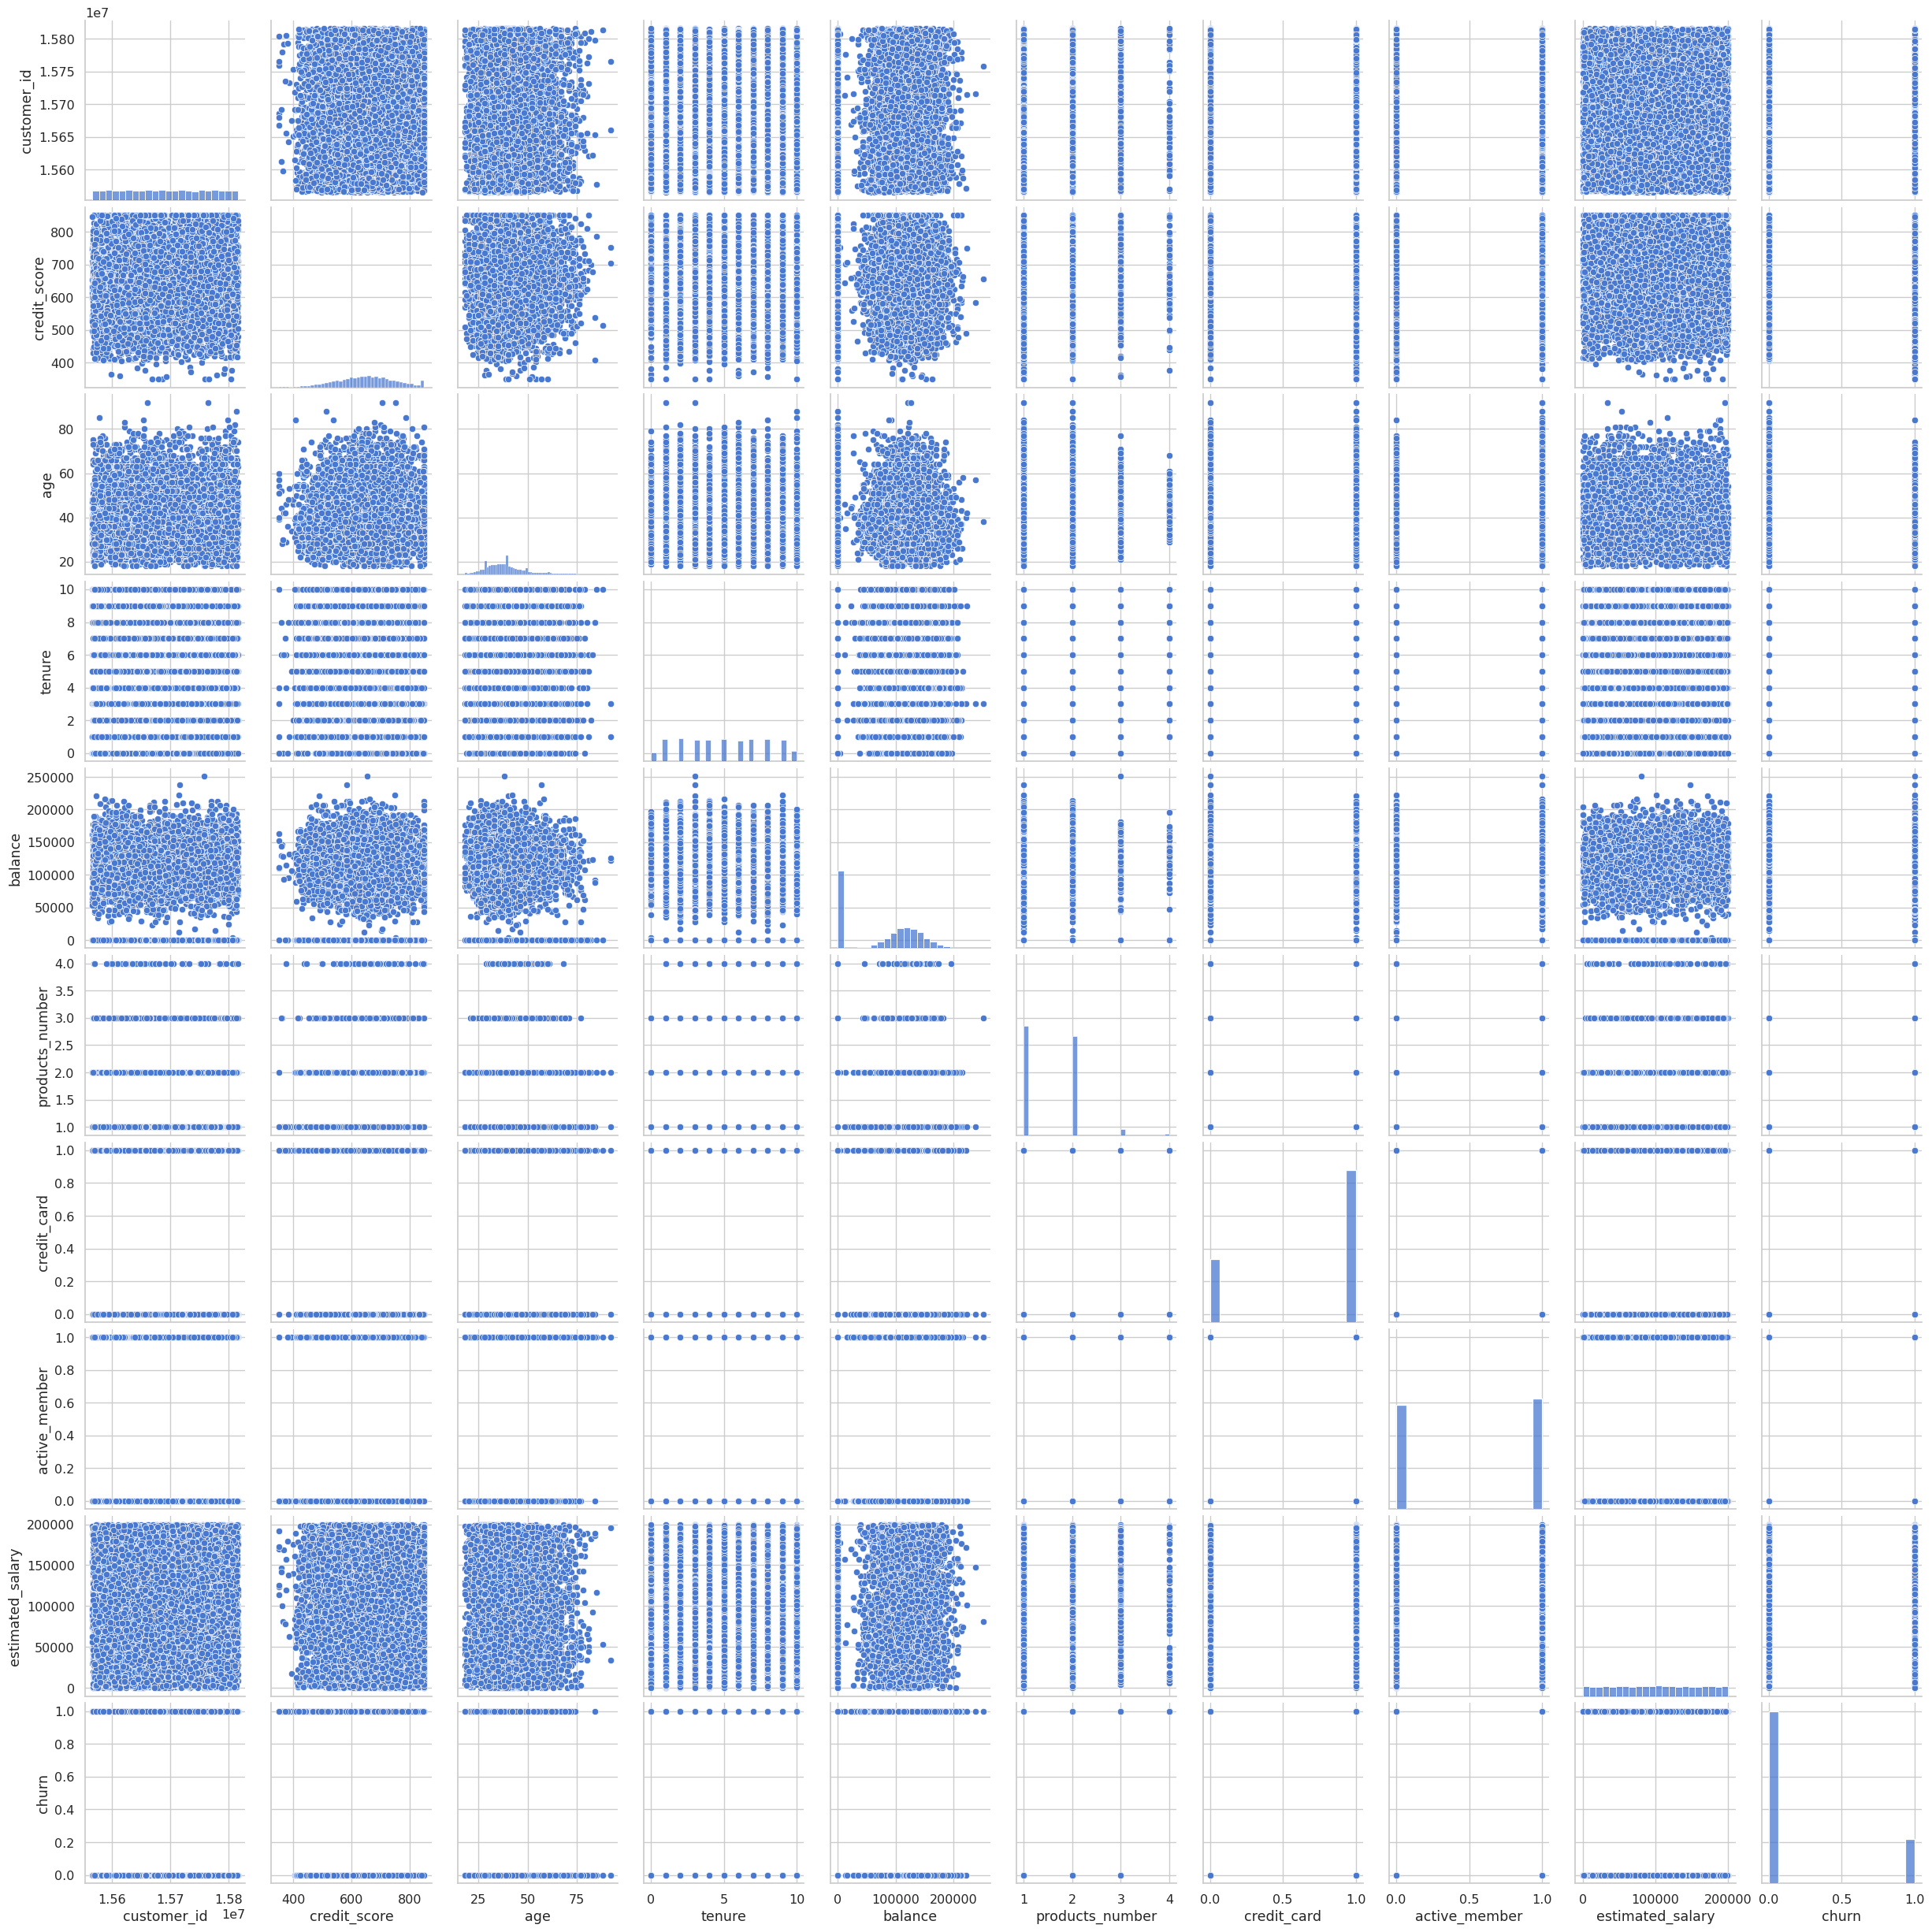

In [7]:
sns.pairplot(df)

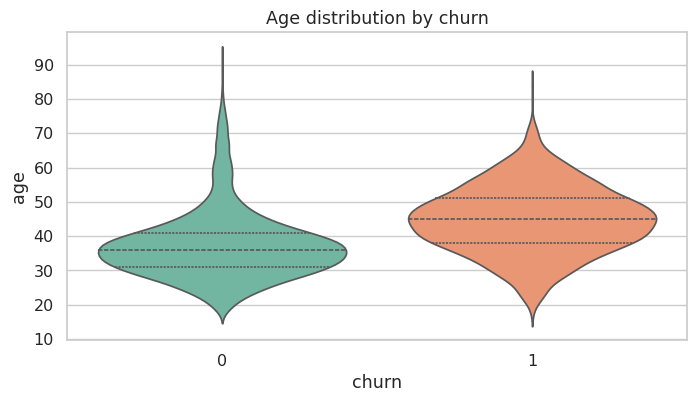

In [9]:
# violin plot for age
plt.figure(figsize = (8,4))
sns.violinplot(data = df, x = 'churn', y = 'age', inner = 'quart', palette = 'Set2')
plt.title('Age distribution by churn')
plt.show()

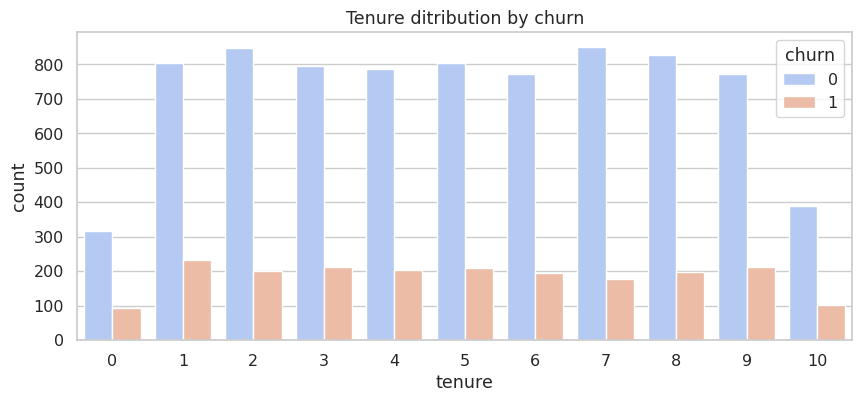

In [10]:
#Tenure distribution
plt.figure(figsize= (10,4))
sns.countplot(data = df, x = 'tenure', hue = 'churn', palette = 'coolwarm')
plt.title('Tenure ditribution by churn')
plt.show()

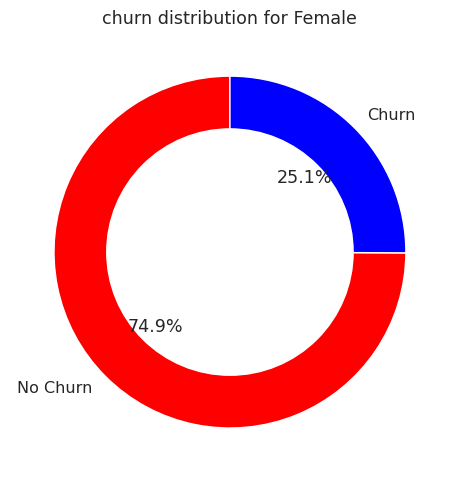

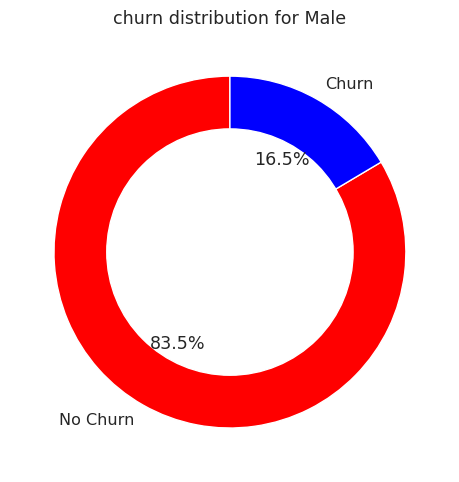

In [11]:
#Gender vs churn donut chart
gender_counts = df.groupby('gender')['churn'].value_counts(normalize = True).unstack().fillna(0)
for gender in gender_counts.index:
  plt.figure(figsize=(5,5))
  plt.pie(gender_counts.loc[gender], labels=['No Churn', 'Churn'],
            autopct='%1.1f%%', startangle=90, colors=['Red', 'Blue'])
  center = plt.Circle((0,0),0.70, fc = 'white')
  fig = plt.gcf()
  fig.gca().add_artist(center)
  plt.title(f'churn distribution for {gender}' )
  plt.tight_layout()
  plt.show()


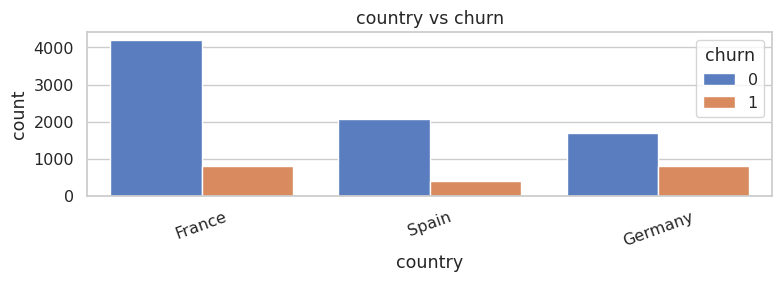

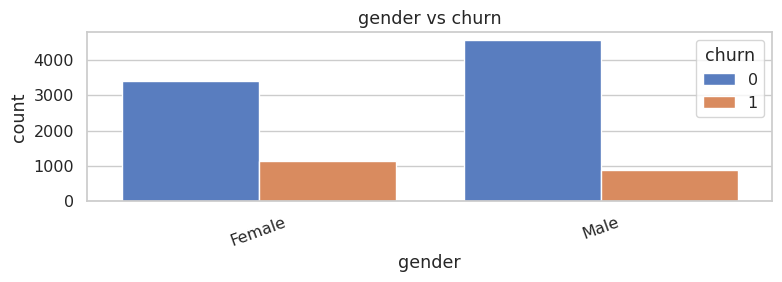

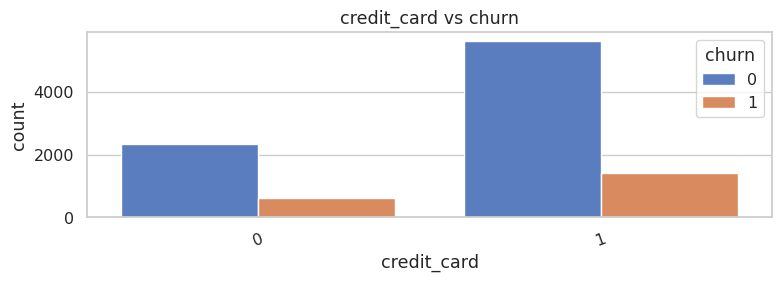

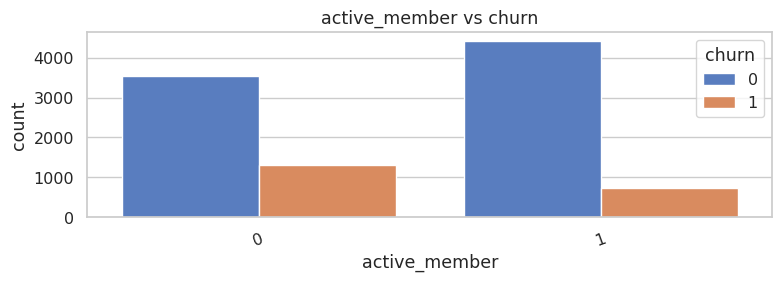

In [12]:
#Categorical Features
cat_cols = ['country', 'gender','credit_card', 'active_member']
for c in cat_cols:
  plt.figure(figsize=(8,3))
  sns.countplot(data = df, x = c, hue = 'churn')
  plt.title(f'{c} vs churn')
  plt.xticks(rotation = 20)
  plt.tight_layout()
  plt.show()

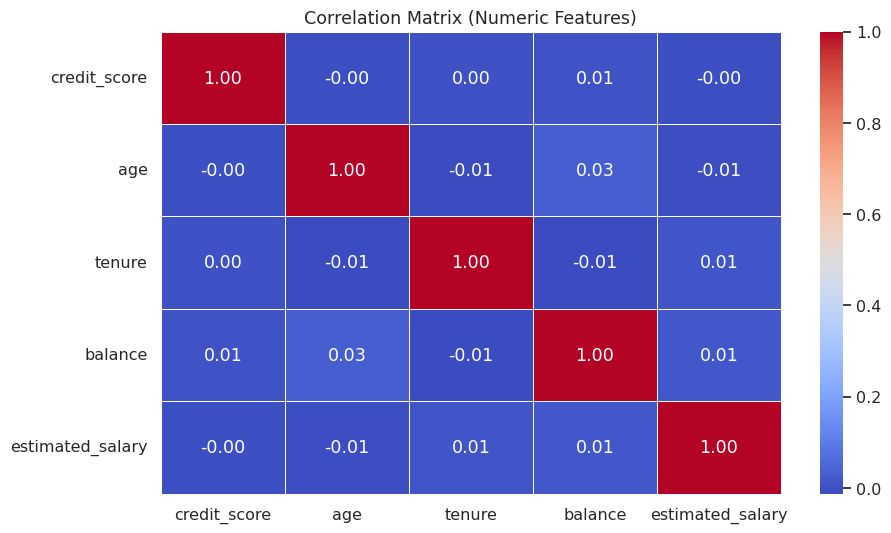

In [13]:
# heatmap visualization
plt.figure(figsize=(10,6))
vars_to_plot = ['credit_score', 'age','tenure', 'balance', 'estimated_salary']
sns.heatmap(df[vars_to_plot].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [14]:
# numeric data correlation heatmap
numeric_data = df[num_cols]
corr = numeric_data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


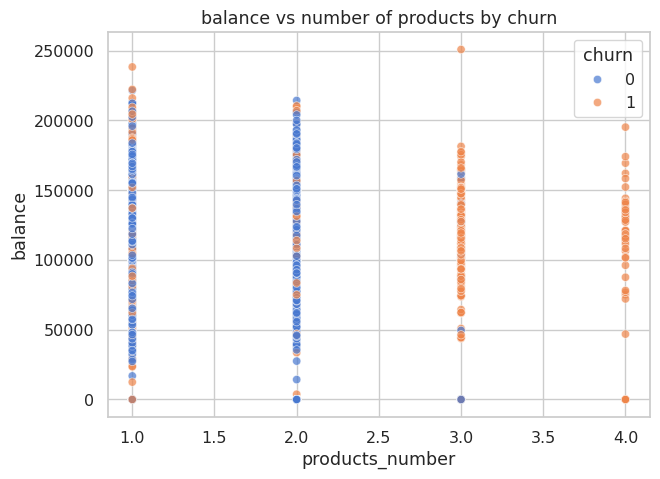

In [15]:
# balance vs products scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data = df, x = 'products_number', y = 'balance', hue= 'churn', alpha = 0.7)
plt.title('balance vs number of products by churn')
plt.show()

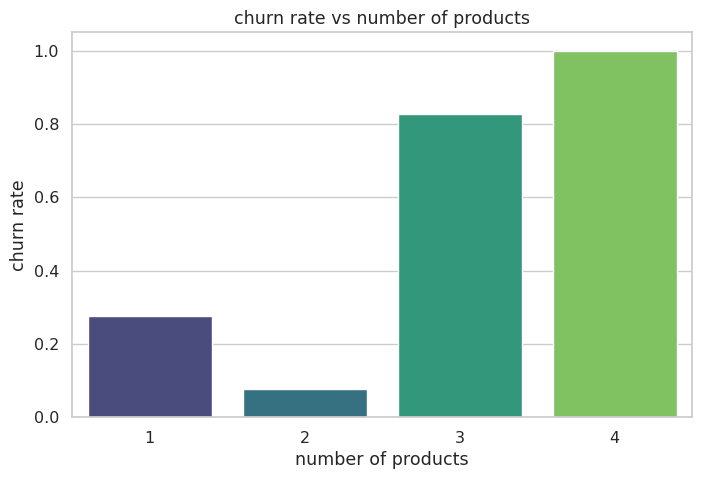

In [16]:
# aggregate churn rate per number of products
churn_rate = df.groupby('products_number')['churn'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data = churn_rate, x = 'products_number', y = 'churn', palette = 'viridis')
plt.xlabel('number of products')
plt.ylabel('churn rate')
plt.title('churn rate vs number of products')
plt.show()

Step 5 Feature engineering

create meaningful features per product, age group, salary bracket and handle missing values

In [17]:
#feature engineering examples
df_fe = df.copy()

# balance per product
df_fe['balance_per_product'] = df_fe['balance']/(df_fe['products_number'].replace(0, np.nan))
df_fe['balance_per_product'].fillna(0, inplace = True)

#Salary balance ratio
df_fe['salary_balance_ratio'] = df_fe['estimated_salary']/(df_fe['balance'].replace(0, np.nan))
df_fe['salary_balance_ratio'].replace([np.inf,-np.inf],np.nan, inplace = True)
df_fe['salary_balance_ratio'].fillna(df_fe['salary_balance_ratio'].median(), inplace= True)

#Age group
bins = [0,25,35,45,55,65,100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
df_fe['age_group'] = pd.cut(df_fe['age'], bins = bins, labels = labels)

#Tenure bucket
df_fe['tenure_bucket'] = pd.cut(df_fe['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])

#flag high balance
df_fe['high_balance'] = (df_fe['balance'] > df_fe['balance'].quantile(0.75)).astype(int)

# Quick checks
df_fe[['balance_per_product','salary_balance_ratio','age','age_group','tenure','tenure_bucket','high_balance']].head()


,balance_per_product,salary_balance_ratio,age,age_group,tenure,tenure_bucket,high_balance
0,0.000000,0.839258,42,35-44,2,1-2,0
1,83807.860000,1.342864,41,35-44,1,1-2,0
2,53220.266667,0.713585,42,35-44,8,6-10,1
3,0.000000,0.839258,39,35-44,1,1-2,0
4,125510.820000,0.630098,43,35-44,2,1-2,0


Step 6 preprocessing - encoding andd scaling

we'll build a preprocessing pipeline that encodes categorical features and scales numerical ones

In [18]:
# Define features and target
target = 'churn'
drop_cols = ['customer_id']
features = [c for c in df_fe.columns if c not in [target] + drop_cols]

numeric_features = ['credit_score','age','tenure','balance','products_number','estimated_salary',
                    'balance_per_product','salary_balance_ratio']
categorical_features = ['country','gender','credit_card','active_member','age_group','tenure_bucket','high_balance']

df_fe[categorical_features]= df_fe[categorical_features].astype('object')
numeric_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
categorical_transformer  = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output= False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)


Numeric features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'salary_balance_ratio']
Categorical features: ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance']


In [19]:
df_fe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,balance_per_product,salary_balance_ratio,age_group,tenure_bucket,high_balance
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.839258,35-44,1-2,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.860000,1.342864,35-44,1-2,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,53220.266667,0.713585,35-44,6-10,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.839258,35-44,1-2,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,125510.820000,0.630098,35-44,1-2,0


step 7 train test split

In [20]:
from re import X
X = df_fe[features]
y = df_fe[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state= 42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Train churn proportion:', y_train.mean())
print('Test churn proportion:', y_test.mean())

X_train shape: (8000, 15)
X_test shape: (2000, 15)
Train churn proportion: 0.20375
Test churn proportion: 0.2035


Step8: train multiple models with a pipeline and compare using cross- validation

In [21]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators= 200, random_state= 42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators= 200, random_state= 42),
    'AdaBoost': AdaBoostClassifier(n_estimators= 200, random_state=42),
    'SVC':SVC(probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5,shuffle = True, random_state= 42)
results = {}

for name, model in models.items():
  pipe = Pipeline(steps = [('preprocessor', preprocessor),
                           ('classifier', model)])
  scores = cross_val_score(pipe, X_train,y_train, cv = cv, scoring = 'roc_auc', n_jobs = -1)
  results[name] = scores
  print(f"{name} AUC: Mean = {scores.mean():.4f} Std = {scores.std():.4f}")

LogisticRegression AUC: Mean = 0.7877 Std = 0.0244
RandomForest AUC: Mean = 0.8486 Std = 0.0130
GradientBoosting AUC: Mean = 0.8627 Std = 0.0097
AdaBoost AUC: Mean = 0.8462 Std = 0.0133
SVC AUC: Mean = 0.8351 Std = 0.0104


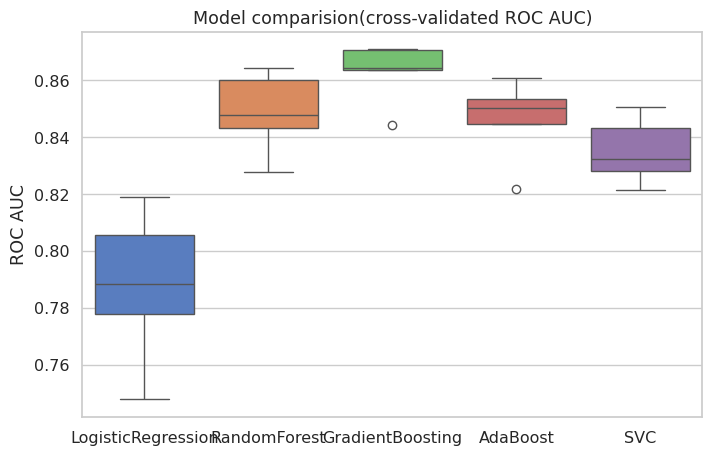

In [23]:
#Boxplot of CV AUC scores
plt.figure(figsize=(8,5))
sns.boxplot(data=[results[m] for m in list(results.keys())])
plt.xticks(ticks=range(len(results)), labels=list(results.keys()))
plt.ylabel('ROC AUC')
plt.title('Model comparision(cross-validated ROC AUC)')
plt.show()

step 9 Fit best model on full train set and evaluate test set

select the best model by men CV AUC above and standard metrics on the best set

In [24]:
# choose best model automatically by mean AUC
best_name = max(results.keys(), key = lambda k: results[k].mean())
best_name, results[best_name].mean()

('GradientBoosting', np.float64(0.8627478787645309))

In [25]:
X_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,balance_per_product,salary_balance_ratio,age_group,tenure_bucket,high_balance
5702,585,France,Male,36,7,0.00,2,1,0,94283.09,0.000,0.839258,35-44,6-10,0
3667,525,Germany,Male,33,4,131023.76,2,0,0,55072.93,65511.880,0.420328,25-34,3-5,1
1617,557,Spain,Female,40,4,0.00,2,0,1,105433.53,0.000,0.839258,35-44,3-5,0
5673,639,Spain,Male,34,5,139393.19,2,0,0,33950.08,69696.595,0.243556,25-34,3-5,1
4272,640,Spain,Female,34,3,77826.80,1,1,1,168544.85,77826.800,2.165640,25-34,3-5,0


TestAccuracy: 0.8680
Test Precision: 0.7804
Test Recall: 0.4889
Test F1-score: 0.6012
Test ROC AUC: 0.8692

 Classification report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



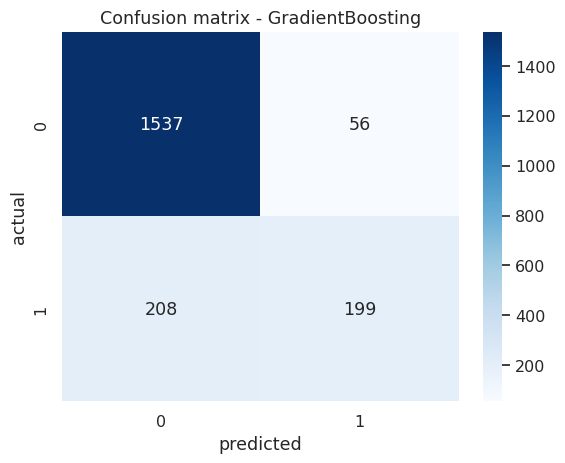

In [26]:
best_model = models[best_name]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)

#predictions
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

#Metrics
acc= accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"TestAccuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

print("\n Classification report:")
print(classification_report(y_test,y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title(f'Confusion matrix - {best_name}')
plt.show()




Step 10 .feature importance

if chosen model supports feature importance (Random Forest/Gradient boosting), show top features

,0
age,0.327672
products_number,0.266458
balance_per_product,0.063208
balance,0.057127
active_member_0,0.052676
country_Germany,0.050689
active_member_1,0.047970
salary_balance_ratio,0.030023
estimated_salary,0.025510
credit_score,0.022685


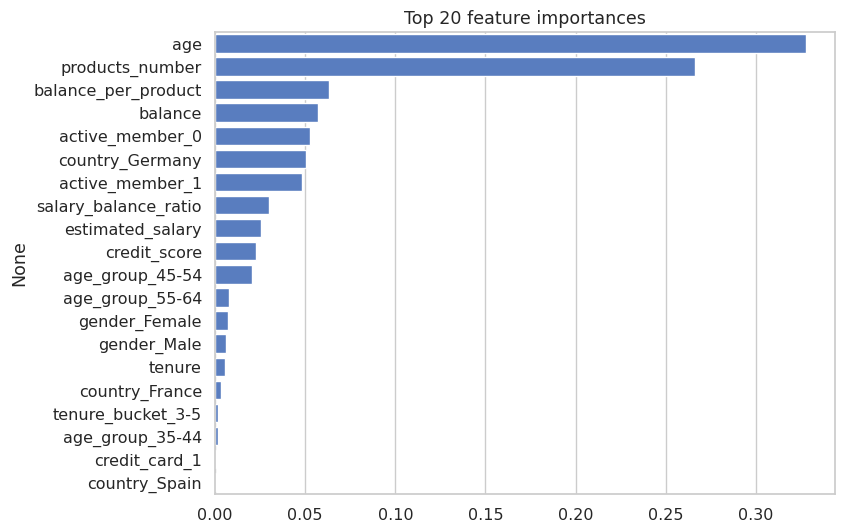

In [27]:
if hasattr(best_pipeline.named_steps['classifier'],'feature_importances_'):
  num_feats = numeric_features
  cat_feats = list(best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
  feature_names = num_feats + cat_feats
  importances = best_pipeline.named_steps['classifier'].feature_importances_
  fi = pd.Series(importances, index = feature_names).sort_values(ascending = False)[:20]
  display(fi)
  plt.figure(figsize = (8,6))
  sns.barplot(x = fi.values, y = fi.index)
  plt.title('Top 20 feature importances')
  plt.show()
else:
  print('Selected model does not provide feature_importances_ attributes')


step11. save best pipeline and preprocessing artifacts

In [28]:
joblib.dump(best_pipeline,'best_churn_pipeline.pkl')
print("Saved pipeline: best_churn_pipeline.pkl")

Saved pipeline: best_churn_pipeline.pkl


step 12. Example: predict churn for new customer

In [31]:
# --- New customer sample ---
sample = {
    'customer_id': 373292028,
    'credit_score': 650,
    'country': 'France',
    'gender': 'Male',
    'age': 40,
    'tenure': 3,
    'balance': 50000.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 60000.0
}

sample_df = pd.DataFrame([sample])

# --- Apply same feature engineering ---
sample_df['balance_per_product'] = sample_df['balance'] / (sample_df['products_number'].replace(0, np.nan))
sample_df['balance_per_product'].fillna(0, inplace=True)

sample_df['salary_balance_ratio'] = sample_df['estimated_salary'] / (sample_df['balance'].replace(0, np.nan))
sample_df['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
sample_df['salary_balance_ratio'].fillna(sample_df['salary_balance_ratio'].median(), inplace=True)

bins = [0,25,35,45,55,65,100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
sample_df['age_group'] = pd.cut(sample_df['age'], bins=bins, labels=labels)

sample_df['tenure_bucket'] = pd.cut(sample_df['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])
sample_df['high_balance'] = (sample_df['balance'] > 50000.0).astype(int)  # can use 75th percentile of training set


# --- Drop ID ---
sample_df = sample_df.drop(columns=['customer_id'])

# --- Predict ---
pred = best_pipeline.predict(sample_df)[0]
prob = best_pipeline.predict_proba(sample_df)[0,1]

print(f'Predicted churn: {pred}, probability of churn: {prob:.3f}')


Predicted churn: 0, probability of churn: 0.030
